# Plasma Beat Wave Accelerator

In the Plasma Beat Wave Accelerator (PBWA) a relativistic plasma wave is resontantly excited by the "ponderomotive" for force of two lasers separated by the plasma frequency, $\omega_p$. The two laser beams beat together forming a modulated beat pattern in the plasma.

This scenario can be easily illustrated using a simple 1D ZPIC simulation. We will launch 2 laser pulses, with frequencies $\omega_a = 10 \, \omega_p$ and $\omega_b = 11 \, \omega_p$ with moderate intensities. The lasers are initialized in vacuum and then enter a uniform plasma starting at position $x_1 = 50.0 \, \mathrm{c} / \omega_p$.

The simulation is run using a "moving window", i.e., the simulation is done in the lab frame, but the simulation window is continuously moved to the right at the speed of light.

In [29]:
# Add zpic library to path
import sys
sys.path.append("../../lib")

import em1d as zpic
import numpy

# Time step
dt = 0.019
# Simulation time
tmax = 100.
# Number of cells
nx  = 1250
# Simulation box size
box = 50.0
# Particles per cell
ppc = 128

# Use a step density profile
electrons = zpic.Species( "electrons", -1.0, ppc,
                           density = zpic.Density( type = "step", start = 50.0))

# Initialize simulation
sim = zpic.Simulation( nx, box, dt, species = electrons )

# Add laser pulses
sim.add_laser( zpic.Laser( start = 50.0, rise = 20.0, flat = 40.0, fall = 1.0, a0 = 0.5, omega0 = 10.0 ))
sim.add_laser( zpic.Laser( start = 50.0, rise = 20.0, flat = 40.0, fall = 1.0, a0 = 0.5, omega0 = 11.0 ))

# Set moving window
sim.set_moving_window()

# Set current smoothing
sim.set_smooth( zpic.Smooth(xtype = "compensated", xlevel = 4) )

## Beat-Wave field

The frequency of the two lasers was chosen so that the beat frequency matches the plasma frequency:

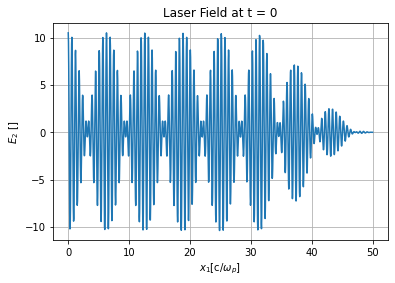

In [30]:
import matplotlib.pyplot as plt

# Plot values at the center of the cells
xmin = sim.emf.dx/2
xmax = sim.emf.box - sim.emf.dx/2

plt.plot(numpy.linspace(xmin, xmax, num = sim.nx), sim.emf.Ey, label = "$E_2$" )
plt.xlabel("$x_1 [\mathrm{c} / \omega_p]$")
plt.ylabel("$E_2$ []")
plt.title("Laser Field at t = {:g}".format(sim.t))
plt.grid(True)
plt.show()

## Run the simulation

We let the laser beams propagate up to $t = 100 \, \omega_p^{-1}$:

In [31]:
# Run the simulation
sim.run( tmax )


Running simulation up to t = 100 ...
n = 5264, t = 100.016
Done.


## Longitudinal Electric field and Plasma Density

The beat-wave field ressonantly excites a high amplitude non-linear plasma wave:

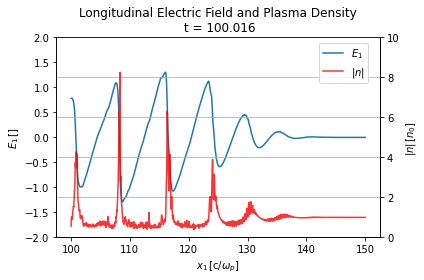

In [35]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# Plot values at the center of the cells
xmin = sim.emf.dx/2 + sim.t
xmax = sim.emf.box - sim.emf.dx/2 + sim.t

ax1.plot(numpy.linspace(xmin, xmax, num = sim.nx), sim.emf.Ex, label = "$E_1$" )
ax1.set_xlabel("$x_1 \, [\mathrm{c}/\omega_p]$")
ax1.set_ylabel("$E_1 \, []$")
ax1.set_ylim(-2,2)


ax2 = ax1.twinx()
ax2.plot(numpy.linspace(xmin, xmax, num = sim.nx), numpy.abs(electrons.charge()),'r', label = "$|n|$" , alpha = 0.8)
ax2.set_ylabel("$|n| \, [n_0]$")
ax2.set_ylim(0,10)

plt.title("Longitudinal Electric Field and Plasma Density\n t = {:g}".format(sim.t))
plt.grid(True)

fig.legend(loc = (0.75,0.70))
fig.tight_layout()

plt.show()

## Particle trapping and acceleration

The plasma wave will trap and accelerate background plasma electrons:

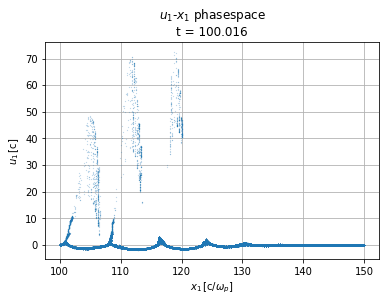

In [33]:
import matplotlib.pyplot as plt

# Simple function to convert particle positions
x = lambda s : (s.particles['ix'] + s.particles['x']) * s.dx + sim.t

plt.plot(x(electrons),  electrons.particles['ux'],  '.', ms = 0.2)
plt.xlabel("$x_1 \, [\mathrm{c}/\omega_p]$")
plt.ylabel("$u_1 \, [\mathrm{c}]$")
plt.title("$u_1$-$x_1$ phasespace\nt = {:g}".format(sim.t))
plt.grid(True)
plt.show()